In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [41]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
print(data.shape)
data.size

(768, 9)


6912

In [44]:
# Summarize the numerical features
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
data.duplicated().sum()

0

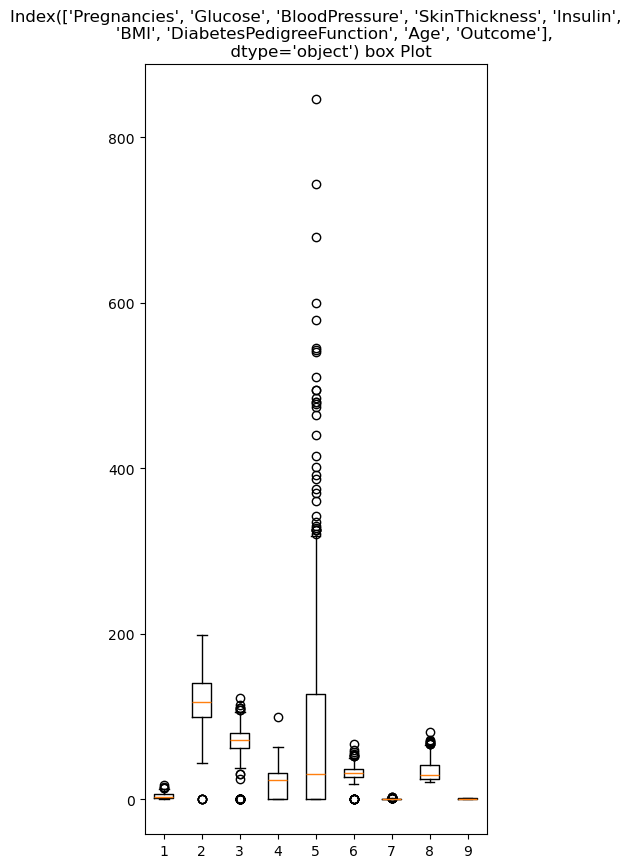

In [46]:
numCols = [data.select_dtypes('number').columns]
plt.figure(figsize=(15,10))
for i, col in enumerate(numCols):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(f"{col} box Plot")

In [47]:
numCols=['BMI','SkinThickness','Insulin','Pregnancies','Glucose','BloodPressure']
for col in numCols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Lf = Q1 - 1.5 * IQR
    Up = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=Lf, upper=Up)


In [48]:
#for zeros
def rep(data,z):
    med=data[z].median()
    data[z]=data[z].replace(0,med)
    return data



In [49]:
data=rep(data,'BMI')
data=rep(data,'SkinThickness')
data=rep(data,'Insulin')
data=rep(data,'Pregnancies')
data=rep(data,'Glucose')
data=rep(data,'BloodPressure')

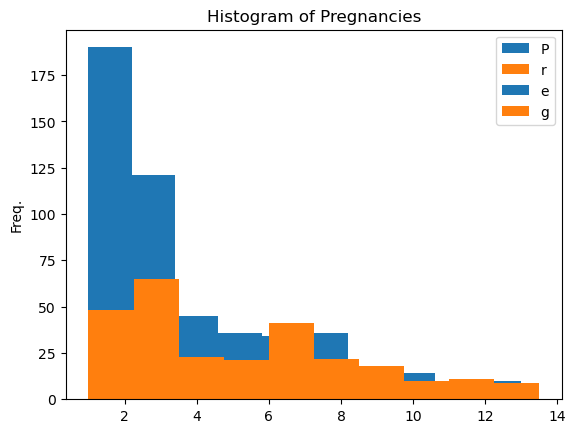

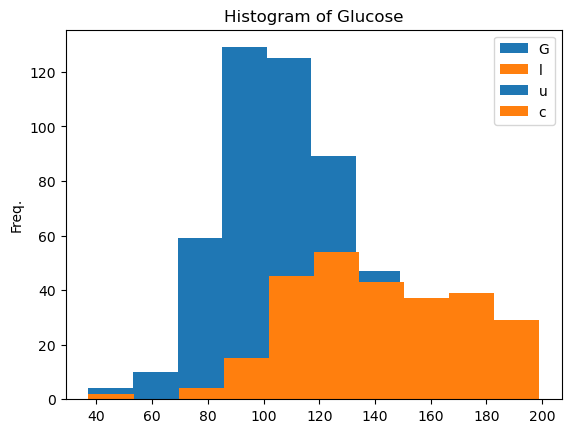

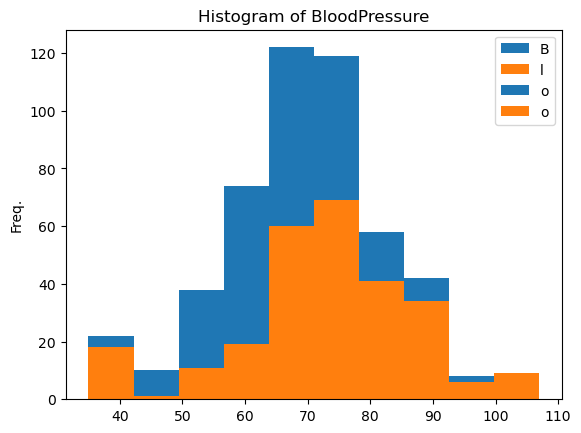

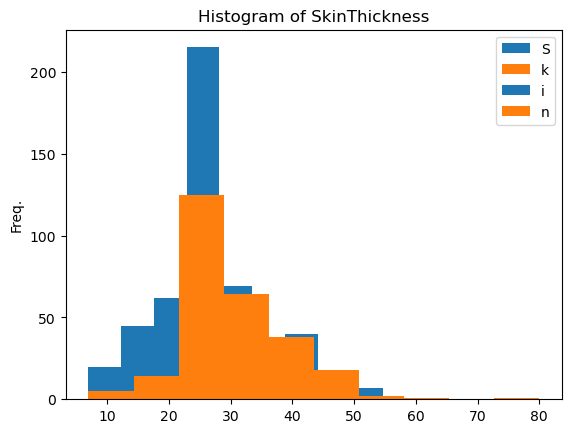

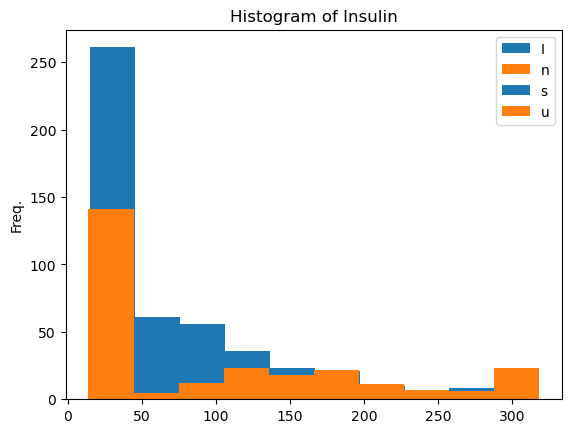

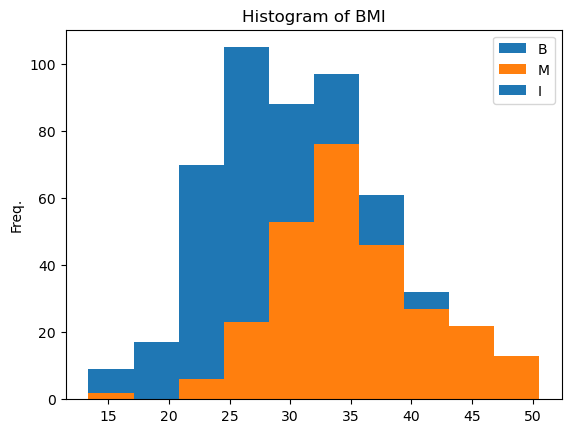

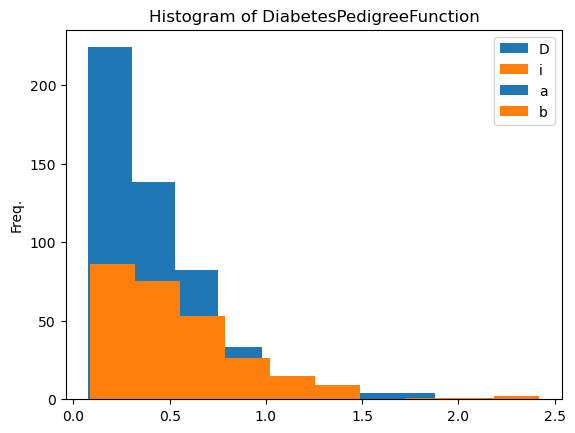

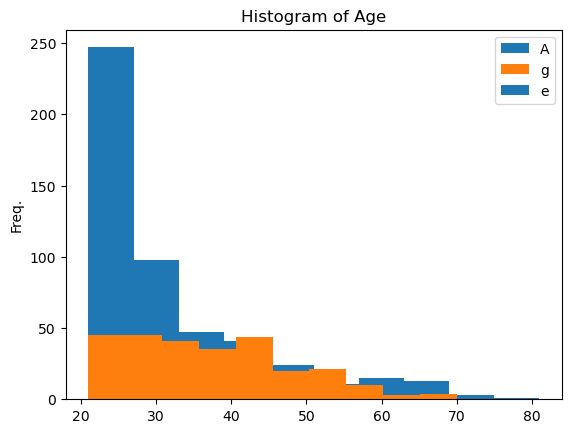

In [50]:
numCols = data.select_dtypes('number').columns.tolist()
numCols.remove('Outcome') 
for col in numCols:
    plt.hist(data[data['Outcome']==0][col],10,label='NON DIABETES')
    plt.hist(data[data['Outcome']==1][col],10,label='DIABETES')
    plt.legend(col)
    plt.ylabel('Freq.')
    plt.title(f'Histogram of {col}')  
    plt.show()

**LINEAR REGRESSION MODEL**

In [51]:
X=data.drop('DiabetesPedigreeFunction', axis=1)
y=data['DiabetesPedigreeFunction']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

**( Fit models and evaluate)**

In [55]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} MSE: {mse:.4f}")

Linear Regression MSE: 0.0856
Ridge Regression MSE: 0.0856
Lasso Regression MSE: 0.0951


Random Forest MSE: 0.1017


In [56]:
# Cross-validation for better estimation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    print(f"{model_name} Cross-validated MSE: {-np.mean(cv_scores):.4f}")

Linear Regression Cross-validated MSE: 0.1108
Ridge Regression Cross-validated MSE: 0.1108
Lasso Regression Cross-validated MSE: 0.1138
Random Forest Cross-validated MSE: 0.1172


In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, interaction_only=False)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly}")


Polynomial Regression MSE: 0.2763440947361683


****CALASSIFICATION****

In [58]:
X = data.drop(columns=['Outcome'])  # All columns except 'Outcome'
y = data['Outcome']  # The target variable is 'Outcome'

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
lr = LogisticRegression(random_state=42)

In [61]:
# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.69      0.69      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [62]:
from sklearn.ensemble import RandomForestClassifier 
# Create the classifier object 
rf_clf = RandomForestClassifier(n_estimators = 100, random_state=4) 
# Train the model using the training sets
rf_clf.fit(X_train, y_train) 
# performing predictions on the test dataset 
y_pred_rf = rf_clf.predict(X_test) 
# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7467532467532467


**DEEP LEARNING**

In [63]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization ,Dropout


In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
model = Sequential()

**LAYERS**

In [66]:
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5994 - loss: 0.6559 - val_accuracy: 0.6748 - val_loss: 0.5624
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7177 - loss: 0.5270 - val_accuracy: 0.7317 - val_loss: 0.5206
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7768 - loss: 0.4765 - val_accuracy: 0.7398 - val_loss: 0.5014
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7633 - loss: 0.4684 - val_accuracy: 0.7480 - val_loss: 0.4859
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7785 - loss: 0.4527 - val_accuracy: 0.7561 - val_loss: 0.4891
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7561 - loss: 0.4885 - val_accuracy: 0.7561 - val_loss: 0.4777
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 0.4827 - val_accuracy: 0.7480 - val_loss: 0.4707
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - loss: 0.4468 - val_accuracy: 0.7317 - val_loss: 0.

In [68]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Deep Learning Model Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6956 - loss: 0.6838 
Deep Learning Model Accuracy: 0.7077922224998474


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.56      0.67      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.70       154



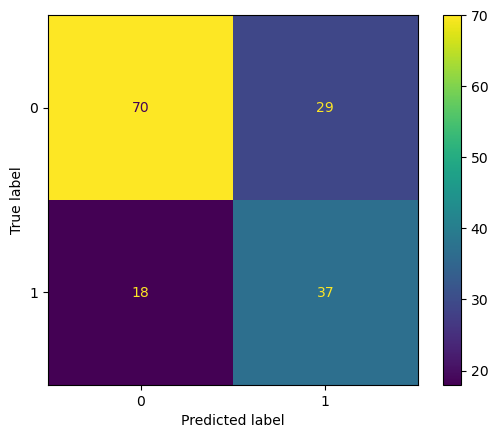

In [69]:
# Make predictions (with threshold 0.5)
y_pred_dl = (model.predict(X_test_scaled) > 0.4).astype("int32")

# Classification report
print(classification_report(y_test, y_pred_dl))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dl)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()


In [70]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[
    ('lr', model1), ('rf', model2)], voting='hard')

ensemble_model.fit(X_train_scaled, y_train)
predictions = ensemble_model.predict(X_test_scaled)


In [ ]:
import joblib
joblib.dump(ensemble_model, 'stroke_model.pkl')

In [71]:
# Classification Report
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
[[85 14]
 [20 35]]


In [72]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
import gradio as gr

# Define the prediction function
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin,
                             bmi, diabetes_pedigree_function, age]])
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = ensemble_model.predict(input_scaled)
    
    return "Diabetes" if prediction[0] == 1 else "No Diabetes"


In [74]:
# Define Gradio input components
inputs = [
    gr.Slider(0, 20,step=1, label="Pregnancies"),
    gr.Slider(50, 200,step=1, label="Glucose"),
    gr.Slider(70, 150,step=1, label="Blood Pressure"),
    gr.Slider(0, 100, step=1,label="Skin Thickness"),
    gr.Slider(0, 400, step=1,label="Insulin"),
    gr.Slider(0, 50,step=0.1, label="BMI"),
    gr.Slider(0.0, 1.5, step=0.01, label="Diabetes Pedigree Function"),
    gr.Slider(0, 100, step=0.5,label="Age"),
]

output = gr.Textbox(label="Prediction")

# Create the Gradio interface
gr.Interface(fn=predict_diabetes, inputs=inputs, outputs=output, title="Diabetes Prediction",
             description="Enter patient details to predict the risk of diabetes.").launch()


* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


**UNSUPERVISED**

In [98]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [99]:
X=data.drop(['Outcome'], axis =1)
y=data['Outcome']
X=StandardScaler().fit_transform(X)

In [101]:
# Calculate Within-Cluster Sum of Squares (WCsum) for k from 1 to 10
WCsum = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    WCsum.append(kmeans.inertia_)

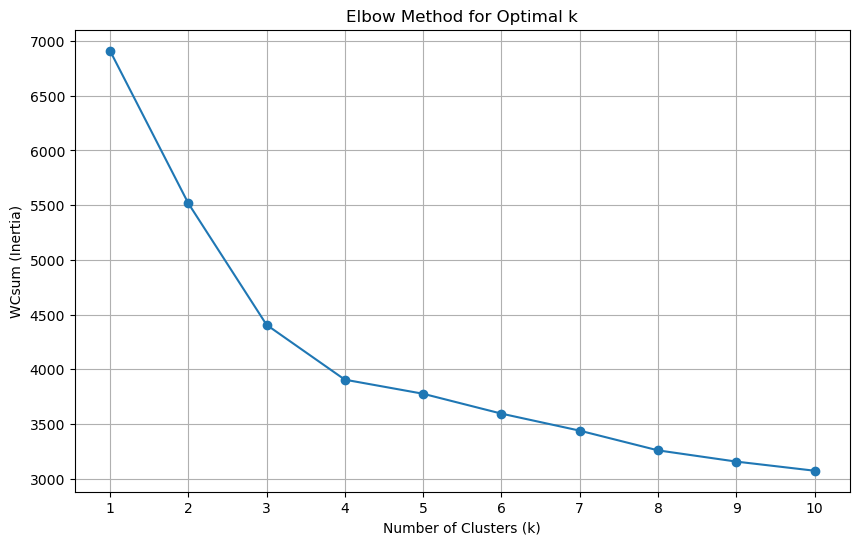

In [102]:
# Plotting the elbow curve to find the optimal k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), WCsum, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCsum (Inertia)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [106]:
from sklearn.metrics import silhouette_score
for i in range (2,5):
    kmeans=KMeans(n_clusters=i,random_state=42)
    clusters=kmeans.fit_predict(X)
    data['Cluster']=clusters
    avg_silhouette_score=silhouette_score(X,clusters)
    print(f'avg_silhouette_score for k={i}:{avg_silhouette_score}')

avg_silhouette_score for k=2:0.20456631029294256
avg_silhouette_score for k=3:0.23461012071952833
avg_silhouette_score for k=4:0.2078437409736221


In [108]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)  # Get cluster assignments
# Perform PCA
pca = PCA(n_components=k)
pca_result = pca.fit_transform(X)

In [ ]:
Pdata = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
Pdata['Cluster'] = clusters

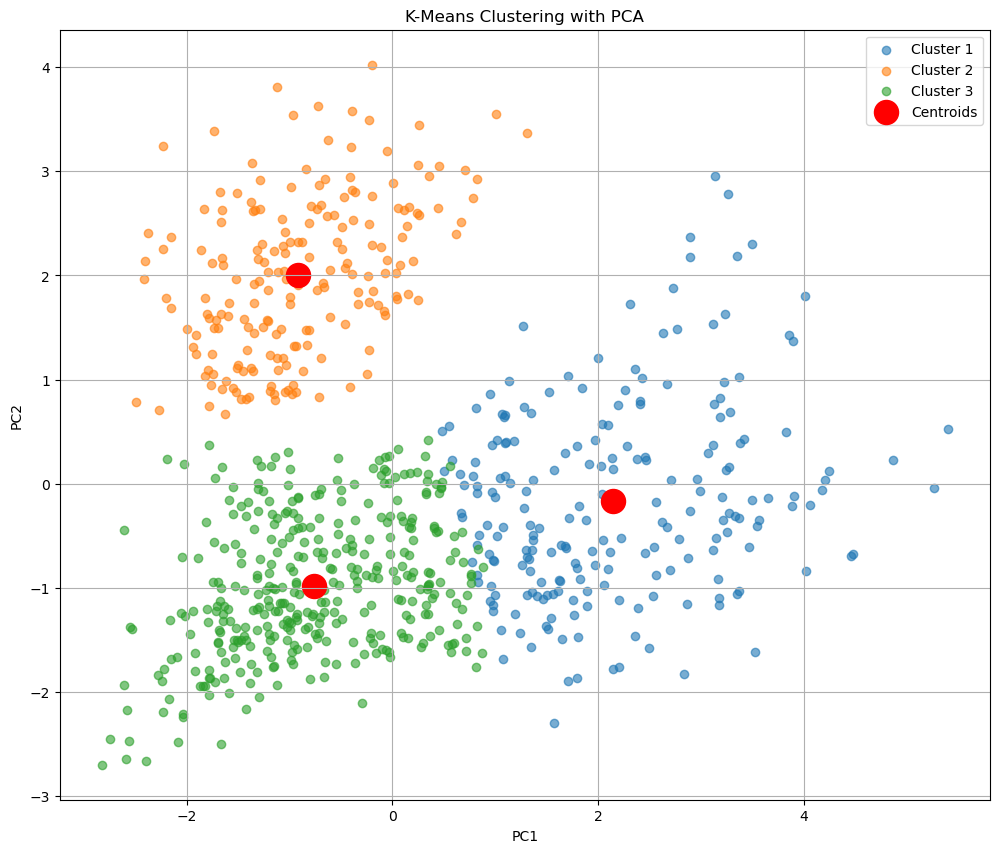

In [110]:
plt.figure(figsize=(12, 10))

# Plot each cluster
for cluster in range(k):
    plt.scatter(Pdata[Pdata['Cluster'] == cluster]['PC1'], 
                Pdata[Pdata['Cluster'] == cluster]['PC2'], 
                label=f'Cluster {cluster + 1}', alpha=0.6)

# Adding centroids to the plot
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)  # Transform centroids using PCA
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()
